<a href="https://colab.research.google.com/github/NayanKanaparthi/Song-Poetry-Generation-Model/blob/main/Text_Prediction_using_RNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  #we will train the model on few irish songs and see if it can learn and generate poetry


In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2023-06-21 17:53:57--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2023-06-21 17:53:57 (50.4 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
from os import read
tokenizer = Tokenizer()
data = open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
Windex=tokenizer.word_index

total_words=len(Windex)+1
print(total_words)

2690


In [ ]:
input_sequences=[]
for line in corpus:
  token_list=tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

#padding sequences
max_sequence_len= max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre'))

#creating labels

xs,labels= input_sequences[:,:-1],input_sequences[:,-1]
#should make the y labels as one hot encoded by using categorical
ys= tf.keras.utils.to_categorical(labels,num_classes=total_words)


In [ ]:
print(xs[6])
print(ys[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
model= Sequential()
model.add(Embedding(total_words,100,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words,activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
history=model.fit(xs,ys,epochs=100,verbose=1)
print(model.summary)

Epoch 1/100
377/377 [==============================] - 62s 25ms/step - loss: 6.7629 - accuracy: 0.0650
Epoch 2/100
377/377 [==============================] - 5s 13ms/step - loss: 6.2490 - accuracy: 0.0756
Epoch 3/100
377/377 [==============================] - 3s 9ms/step - loss: 5.9862 - accuracy: 0.0838
Epoch 4/100
377/377 [==============================] - 3s 7ms/step - loss: 5.6694 - accuracy: 0.1034
Epoch 5/100
377/377 [==============================] - 3s 9ms/step - loss: 5.3158 - accuracy: 0.1200
Epoch 6/100
377/377 [==============================] - 3s 9ms/step - loss: 4.9547 - accuracy: 0.1364
Epoch 7/100
377/377 [==============================] - 3s 8ms/step - loss: 4.6063 - accuracy: 0.1557
Epoch 8/100
377/377 [==============================] - 3s 7ms/step - loss: 4.2650 - accuracy: 0.1810
Epoch 9/100
377/377 [==============================] - 3s 7ms/step - loss: 3.9414 - accuracy: 0.2187
Epoch 10/100
377/377 [==============================] - 3s 9ms/step - loss: 3.6262 - acc

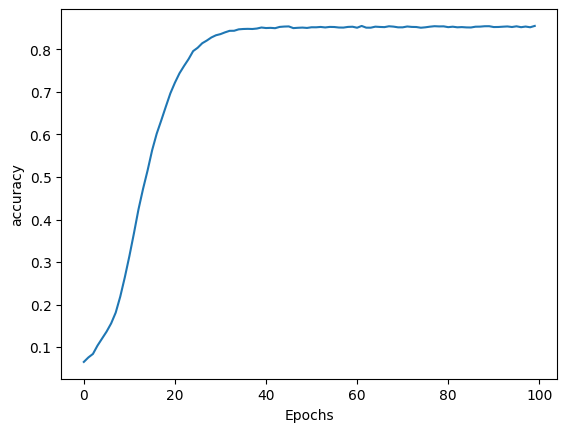

In [ ]:
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 30ms/step
I've got a bad feeling about this early early as my love stand to play you down to dublin dear he did shell say look she stand away from now home and he cant remember that once in the wall light is the sea are green your true love but in love stand on the mossy prison thorn we green write warm him and gone it is cry both sea and our love and me stand on prison ground he fair oer the thorn of killarney rest a fathers rest ra lassies hill enough smile bann scarce hares am doneen pate rich drunk sparkling hair middle resemble


In [ ]:
print(tokenizer.word_index.items())

dict_items([('the', 1), ('and', 2), ('i', 3), ('to', 4), ('a', 5), ('of', 6), ('my', 7), ('in', 8), ('me', 9), ('for', 10), ('you', 11), ('all', 12), ('was', 13), ('she', 14), ('that', 15), ('on', 16), ('with', 17), ('her', 18), ('but', 19), ('as', 20), ('when', 21), ('love', 22), ('is', 23), ('your', 24), ('it', 25), ('will', 26), ('from', 27), ('by', 28), ('they', 29), ('be', 30), ('are', 31), ('so', 32), ('he', 33), ('old', 34), ('no', 35), ('oh', 36), ('ill', 37), ('at', 38), ('one', 39), ('his', 40), ('there', 41), ('were', 42), ('heart', 43), ('down', 44), ('now', 45), ('we', 46), ('where', 47), ('young', 48), ('never', 49), ('go', 50), ('come', 51), ('then', 52), ('did', 53), ('not', 54), ('said', 55), ('away', 56), ('their', 57), ('sweet', 58), ('them', 59), ('green', 60), ('if', 61), ('take', 62), ('our', 63), ('like', 64), ('night', 65), ('day', 66), ('o', 67), ('out', 68), ('fair', 69), ('this', 70), ('town', 71), ('have', 72), ('can', 73), ('true', 74), ('its', 75), ('thou'